# 07-02: Generating Functions and the Excess Degree Distribution

*November 30th 2022*  

In this practice session, we compare generating functions for the degree distribution and the excess degree distribution of random networks.

In [45]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

from collections import Counter

plt.style.use('default')
sns.set_style("whitegrid")

In [46]:
def degree_distribution(network):
    degrees = pp.statistics.degree_sequence(network)
    Nk = Counter(degrees)
    dist = {}
    for k in set(degrees):
        dist[k] = Nk[k]/len(degrees)
    return dist

def excess_degree_distribution(network):
    excess_degrees = []
    for e in network.edges:
        excess_degrees.append(network.degrees()[e.v.uid]-1)
        excess_degrees.append(network.degrees()[e.w.uid]-1)
    Nk = Counter(excess_degrees)
    dist = {}
    for k in set(excess_degrees):
        dist[k] = Nk[k]/len(excess_degrees)
    return dist


def generating_function(network, x, dist=degree_distribution):
    g_0 = 0
    P = dist(network)
    for k in set(pp.statistics.degree_sequence(network)):
        if dist == degree_distribution:
            g_0 += P[k] * (x)**(k)
        else:
            g_0 += P[k-1] * (x)**(k-1)
    return g_0

In [47]:
n = pp.Network(directed = False)
n.add_edge('a', 'b')
n.add_edge('b', 'c')
n.add_edge('b', 'd')
n.add_edge('c', 'a')
n.add_edge('d', 'e')
n.add_edge('e', 'f')
n.add_edge('f', 'd')
n.add_edge('f', 'g')
n.add_edge('g', 'd')
n.plot()

Text(0, 0.5, '$G_0(x)$')

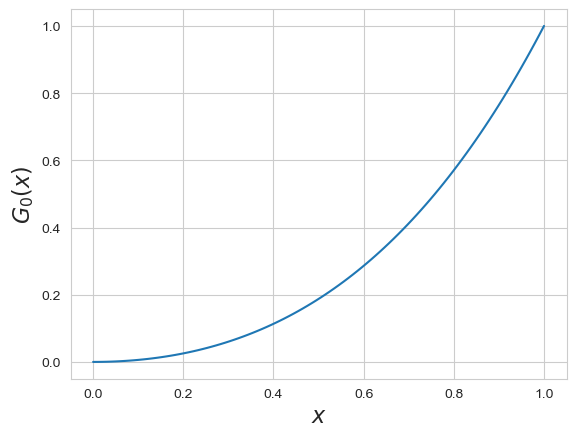

In [48]:
x = np.linspace(0, 1, 100)
y = generating_function(n, x, dist=degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

Text(0, 0.5, '$G_1(x)$')

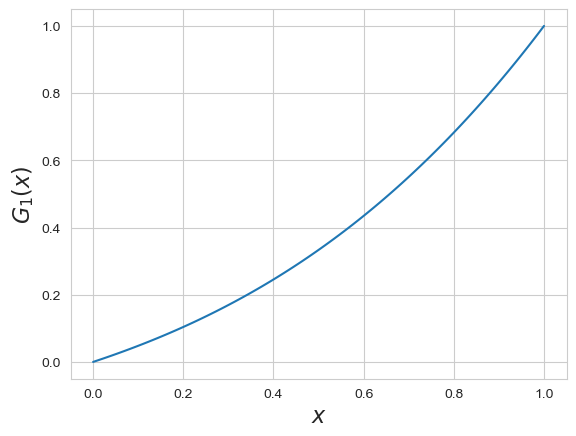

In [49]:
x = np.linspace(0, 1, 100)
y = generating_function(n, x, dist=excess_degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_1(x)$', fontsize=16)

In [50]:
def generating_function_excess_degree(network, x):
    g_0 = 0
    P = degree_distribution(network)
    for k in set(pp.statistics.degree_sequence(network)):
        g_0 += (k) * P[k] * (x)**(k-1)
    return g_0/network.mean_degree()

Text(0, 0.5, '$G_1(x)$')

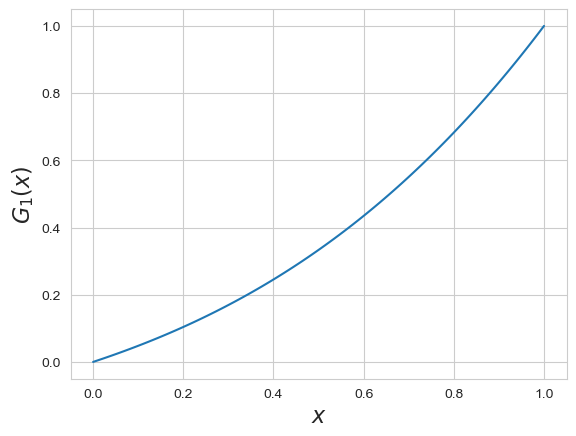

In [51]:
x = np.linspace(0, 1, 100)
y = generating_function_excess_degree(n, x)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_1(x)$', fontsize=16)

Text(0, 0.5, '$G_0(x)$')

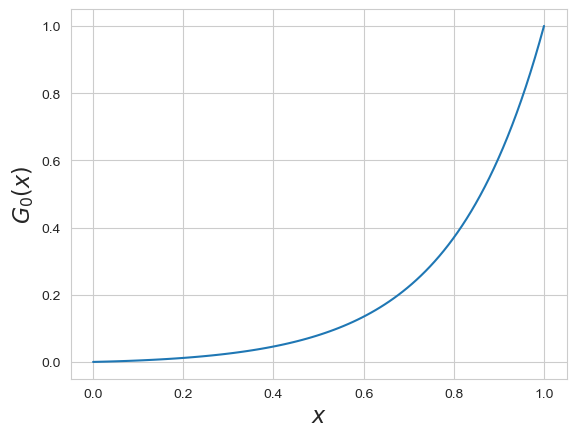

In [60]:
n = pp.generators.ER_np(100, 5/100)
x = np.linspace(0, 1, 100)
y = generating_function(n, x, dist=degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

Text(0, 0.5, '$G_1(x)$')

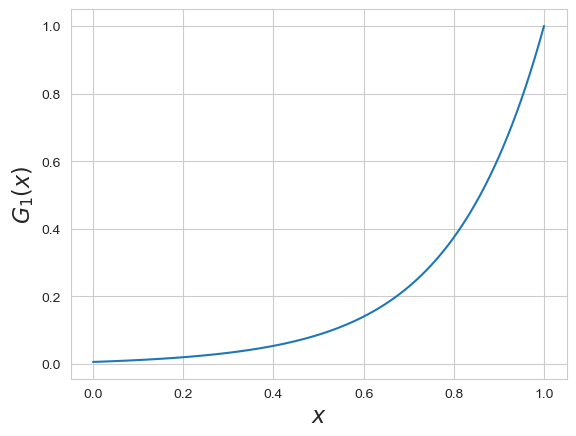

In [61]:
y = generating_function(n, x, dist=excess_degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_1(x)$', fontsize=16)

Text(0, 0.5, '$G_0(x)$')

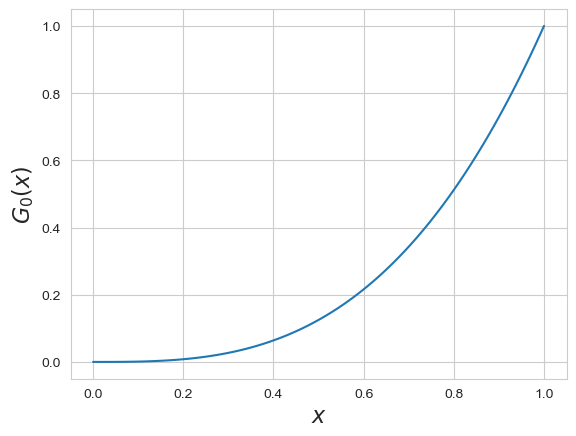

In [62]:
n = pp.generators.Molloy_Reed([3]*100)
x = np.linspace(0, 1, 100)
y = generating_function(n, x, dist=degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

Text(0, 0.5, '$G_1(x)$')

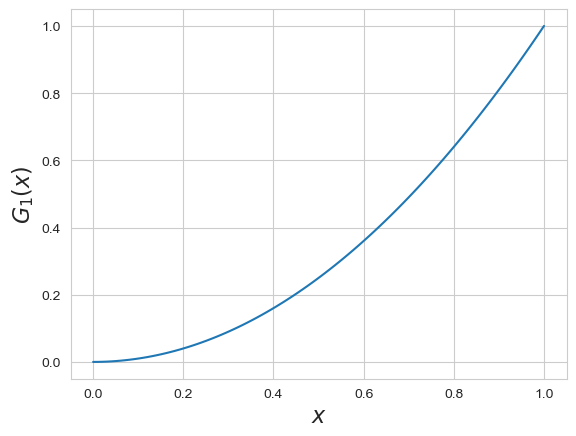

In [63]:
y = generating_function(n, x, dist=excess_degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_1(x)$', fontsize=16)

Text(0, 0.5, '$G_0(x)$')

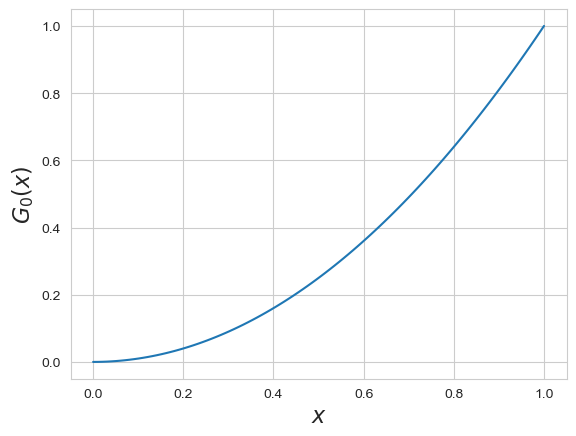

In [64]:
n = pp.generators.Molloy_Reed([2]*100)
x = np.linspace(0, 1, 100)
y = generating_function(n, x, dist=degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

Text(0, 0.5, '$G_1(x)$')

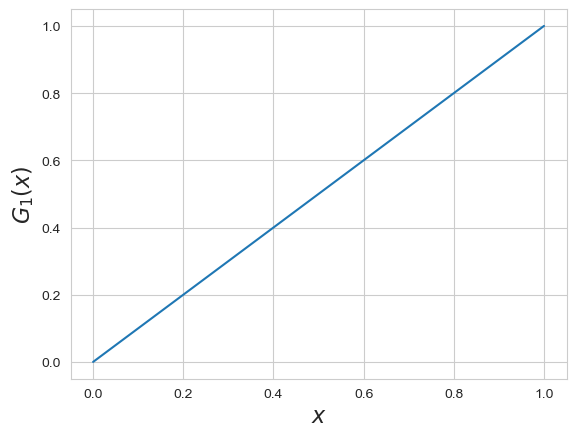

In [65]:
y = generating_function(n, x, dist=excess_degree_distribution)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_1(x)$', fontsize=16)